<a href="https://colab.research.google.com/github/seyed-mohammadreza-mousavi/ml-playground-starter/blob/main/decistion_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tutorial on Decision Trees**

## **1. Introduction to Decision Trees**

A **Decision Tree** is a non-linear model used for both classification and regression tasks. It is a tree-like structure where each internal node represents a "decision" based on a feature, and each leaf node represents an output label (or value for regression). The decision tree model recursively splits the dataset into subsets based on feature values until it reaches a leaf node.

### **Key Concepts:**
- **Root Node**: The topmost node, representing the entire dataset.
- **Internal Nodes**: Represent decisions based on features.
- **Leaf Nodes**: Represent the predicted output (class or value).
- **Branches**: Represent the flow from one decision to another.

## **2. Theory Behind Decision Trees**

### **2.1 Splitting Criteria**
To build a decision tree, we need to decide how to split the data at each node. There are different splitting criteria:

- **For Classification**: The most common criterion is **Gini Impurity** or **Entropy** (for Information Gain).
- **For Regression**: A commonly used criterion is **Mean Squared Error** (MSE).

### **2.2 Gini Impurity (for Classification)**
The Gini impurity measures the "impurity" of a dataset. A Gini index of 0 means that all samples belong to a single class (pure), and a Gini index of 1 means the samples are uniformly distributed across all classes.

#### Formula:
For a binary classification problem, the Gini Impurity for a node is calculated as:

$$
Gini(p) = 1 - p^2 - (1 - p)^2
$$

Where:
- \( p \) is the probability of a class in the node.

### **2.3 Entropy and Information Gain (for Classification)**
Entropy is used to measure the uncertainty or disorder in the data. Information Gain is calculated based on how much entropy is reduced by a split. The goal is to maximize Information Gain.

#### Formula:
- **Entropy**:

$$
Entropy(S) = -p_1 \log_2(p_1) - p_2 \log_2(p_2)
$$

Where \( p_1 \) and \( p_2 \) are the probabilities of the classes in the node.

- **Information Gain**:

$$
IG(S, A) = Entropy(S) - \sum_{v \in A} \frac{|S_v|}{|S|} Entropy(S_v)
$$

Where \( A \) is a feature and \( S_v \) is the subset of data for which feature \( A \) takes value \( v \).

### **2.4 Mean Squared Error (for Regression)**
For regression tasks, the splitting criterion is often **Mean Squared Error** (MSE). It measures the variance within the splits.

#### Formula:
$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y})^2
$$

Where:
- \( y_i \) is the true value.
- \( \hat{y} \) is the predicted value (mean of the values in the split).

## **3. Building a Decision Tree in Python**

Now let’s build a decision tree for classification using the **Iris dataset**. We'll use the `scikit-learn` library to implement the decision tree algorithm.

### **3.1 Import Libraries**
First, we need to import the necessary libraries.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score


3.2 Load the Data

Let's load the Iris dataset, which is a simple dataset for classification.

In [2]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Convert to DataFrame for easier visualization
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y

3.3 Train-Test Split

Next, we will split the data into training and test sets.

In [3]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

3.4 Initialize and Train the Decision Tree Classifier

We will create and train the decision tree classifier.

In [4]:
# Initialize DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

3.5 Make Predictions

Now, let's use the trained model to make predictions on the test set.

In [5]:
# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


3.6 Visualizing the Decision Tree

To better understand how the decision tree works, we can visualize it.

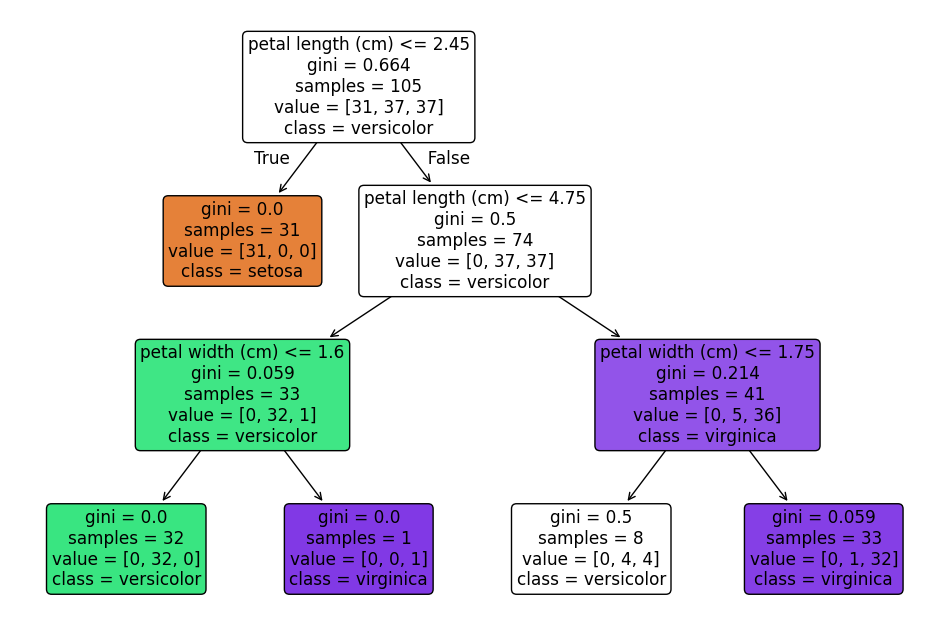

In [6]:
# Plot the decision tree
plt.figure(figsize=(12,8))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, rounded=True)
plt.show()

3.7 Evaluating the Model

You can evaluate the model by looking at its accuracy and inspecting the confusion matrix or classification report.

In [7]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix
print(confusion_matrix(y_test, y_pred))

# Classification Report
print(classification_report(y_test, y_pred))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



4. Understanding the Results
4.1 Accuracy

The accuracy of the model will tell you how well the decision tree is able to classify the samples from the test set. You can try different hyperparameters like max_depth to see how the tree grows and how it impacts the model's performance.

4.2 Decision Tree Visualization

The decision tree plot shows how the data is being split at each node. Each node represents a feature test, and the branches represent the outcome of that test. The leaf nodes show the predicted class.

4.3 Hyperparameter Tuning

The DecisionTreeClassifier in scikit-learn has several hyperparameters that can be tuned:

criterion: The function to measure the quality of a split ('gini' or 'entropy').

max_depth: The maximum depth of the tree.

min_samples_split: The minimum number of samples required to split an internal node.

min_samples_leaf: The minimum number of samples required to be at a leaf node.

You can experiment with these parameters to see how they affect the model.

5. Advanced Topics: Overfitting and Pruning
5.1 Overfitting

Decision trees are prone to overfitting, especially when the tree is very deep and fits noise in the training data. To prevent overfitting, you can:

Limit the depth of the tree (max_depth).

Set a minimum number of samples required to split a node (min_samples_split).

Set a minimum number of samples required to be at a leaf (min_samples_leaf).

5.2 Pruning

Pruning is the process of removing parts of the tree that provide little predictive power. You can prune a decision tree by setting constraints like max_depth, min_samples_split, etc., or use post-pruning techniques.

6. Conclusion

In this tutorial, we have covered the theoretical aspects of decision trees, including how they are built, the criteria used for splitting, and how to implement them using Python and scikit-learn. We also visualized the decision tree to better understand how the model works. By tuning hyperparameters and applying pruning techniques, you can prevent overfitting and improve the performance of your decision tree model.